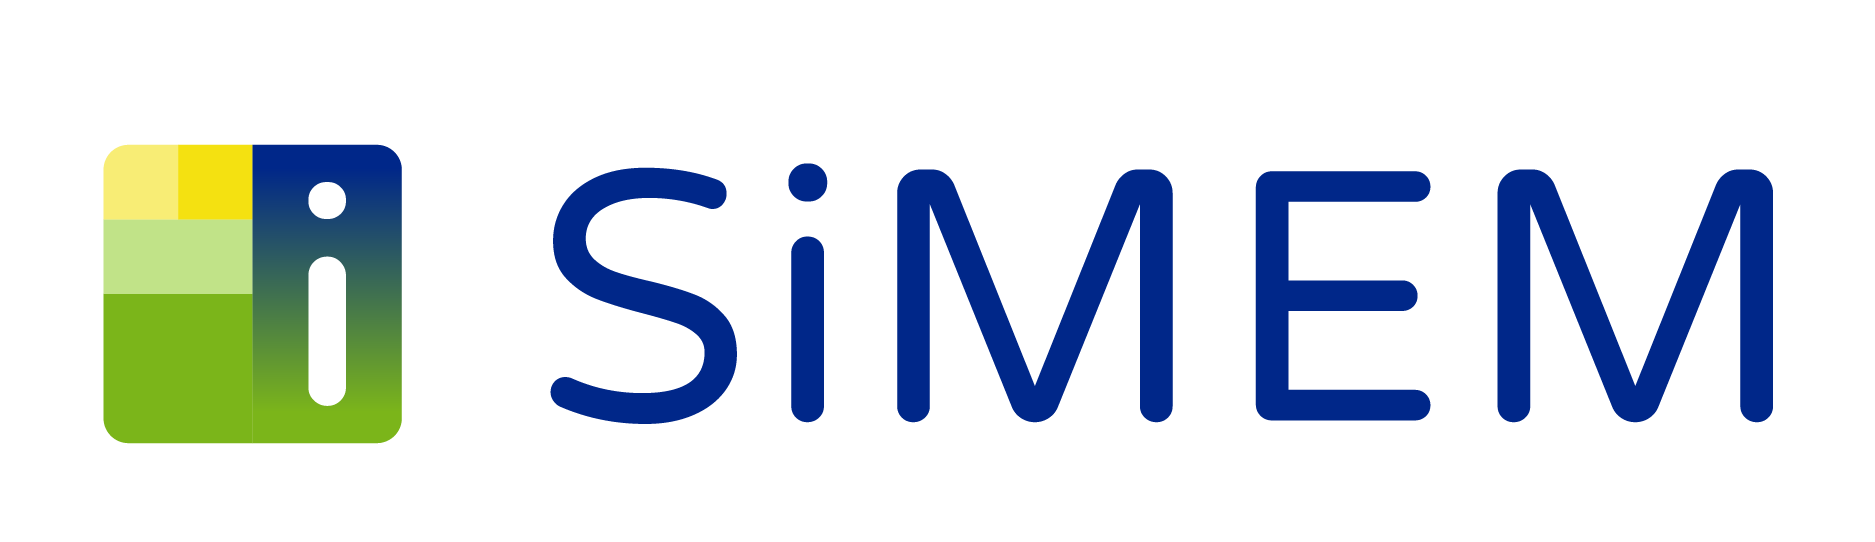

[SiMEM](https://www.simem.co/)

## Caso de uso - Costo Equivalente Real de Energía y Costo Equivalente de Energía

# Objetivos de este Notebook

* Explicar cómo se realiza la instalación e importación de la librería pydataxm desde la consola para su uso en ambientes locales
* Explicar cómo se pueden consultar los conjuntos de datos a través de la librería Pydataxm
* Explicar cómo realizar el procesamiento y manipulación de los datos consultados
* Explicar el análisis de los datos consultados para dar respuesta al caso de uso propuesto
 
**Índice**

1. [Instalación de librerías](#section1)

2. [Importación de librerías](#section2)

3. [Consultar información de los conjuntos de datos](#section3)

4. [Manipulación de datos](#section4)

5. [Análisis para dar respuesta al caso de uso](#section5)

<a id='section1'></a>
# 1. Instalación de la librería
Ejecutar el siguiente comando en el CMD para instalar la librería de python.

In [1]:
# import sys
# !{sys.executable} -m pip install pydataxm

<a id='section2'></a>
# 2. Importación de librerías

In [3]:
# Importación de librerías necesarias para la consulta y análisis de datos
from pydataxm.pydatasimem import ReadSIMEM,VariableSIMEM  # Importa clases para interactuar con datos del sistema SIMEM, utilizado para acceder a información energética en Colombia
import pandas as pd                                       # Librería para manipulación y análisis de datos en estructuras tipo DataFrame, muy útil para limpiar, transformar y explorar datos
import matplotlib.pyplot as plt                           # Para crear gráficos estáticos como barras, líneas, histogramas, etc.

<a id='section3'></a>
# 3. Consultar información de los conjuntos de datos
El método de extracción recibe los parámetros con los que se va a realizar la consulta. 
El datasetID para un conjunto particular se puede encontrar en el [catálogo de conjuntos de datos.](https://www.simem.co/pages/catalogodatos/51FC0A59-3A00-462C-B449-9CB8D5E007FB)  
Para este ejemplo los conjuntos a presentar son [Costo Equivalente Real de Energía (CERE)](https://www.simem.co/datadetail/aecac40a-6ec9-4dd6-a794-bccb7d950035) y [Costo Equivalente de Energía (CEE)](https://www.simem.co/datadetail/0d5da144-2588-4396-b1e5-f98c6ca74b89), para el período 2022-2024.

Se definen los parámetros de entrada y se crea el objeto ReadSIMEM() para realizar las consultas.

La función main contiene todo el proceso para transportar la información del dataset entre el rango de fechas solicitadas a un dataframe. Después de este paso, el proceso es de manipulación y visualización de datos.

In [7]:
id_dataset = '0d5da1'                                          # ID del conjunto de datos a consultar
fecha_inicial = '2022-01-01'                                   # Fecha de inicio del rango de consulta
fecha_final = '2024-12-31'                                     # Fecha de fin del rango de consulta
simem_cee = ReadSIMEM(id_dataset, fecha_inicial, fecha_final)  # Instancia de la clase ReadSIMEM con los parámetros definidos
df_cee = simem_cee.main()                                      # Ejecución del método principal para obtener los datos en un DataFrame
display(df_cee.head(20))                                       # Visualización de las primeras 20 filas del DataFrame

****************************************************************************************************
Initializing object
The object has been initialized with the dataset: "Costo Equivalente de Energía (CEE)"
****************************************************************************************************
Inicio consulta sincronica
Creacion url: 0.0008816719055175781
Extraccion de registros: 3.4813339710235596
End of data extracting process
****************************************************************************************************


,CodigoVariable,Fecha,CodigoDuracion,UnidadMedida,Valor
0,CEE,2023-12-01,P1M,COP/kWh,74.55
1,CEE,2023-11-01,P1M,COP/kWh,82.56
2,CEE,2023-10-01,P1M,COP/kWh,80.91
3,CEE,2023-09-01,P1M,COP/kWh,82.68
4,CEE,2023-08-01,P1M,COP/kWh,79.99
5,CEE,2023-07-01,P1M,COP/kWh,84.41
6,CEE,2023-06-01,P1M,COP/kWh,92.27
7,CEE,2023-05-01,P1M,COP/kWh,93.09
8,CEE,2023-04-01,P1M,COP/kWh,98.08
9,CEE,2023-03-01,P1M,COP/kWh,99.65


In [12]:
# Se utiliza la clase VariableSIMEM para la lectura del CERE ya que esta nos permite extraer la información en  su máxima Versión

cod_variable = 'CERE'                                                  # Código de la variable a consultar
simem_cere = VariableSIMEM(cod_variable, fecha_inicial, fecha_final)   # Instancia de la clase ReadSIMEM con los parámetros definidos
df_cere = simem_cere.get_data()                                        # Ejecución del método principal para obtener los datos en un DataFrame
df_cere.reset_index(inplace=True)
display(df_cere.head(20))                                              # Visualización de las primeras 20 filas del DataFrame

****************************************************************************************************
Initializing object
The object has been initialized with the dataset: "Costo Equivalente Real de Energía (CERE)"
****************************************************************************************************
Inicio consulta sincronica
Creacion url: 0.0008697509765625
Extraccion de registros: 3.659799814224243
End of data extracting process
****************************************************************************************************
****************************************************************************************************
Initializing object
The object has been initialized with the dataset: "Versiones de factura para la liquidación mensual"
****************************************************************************************************
Inicio consulta sincronica
Creacion url: 0.0025832653045654297
Extraccion de registros: 52.15078330039978
End of data extractin

,Fecha,Version,CodigoVariable,CodigoDuracion,UnidadMedida,Valor
0,2023-12-01,TX6,CERE,P1M,COP/kWh,76.61
1,2023-11-01,TX4,CERE,P1M,COP/kWh,81.49
2,2023-10-01,TX4,CERE,P1M,COP/kWh,76.50
3,2023-09-01,TX6,CERE,P1M,COP/kWh,79.66
4,2023-08-01,TX4,CERE,P1M,COP/kWh,82.24
5,2023-07-01,TX5,CERE,P1M,COP/kWh,82.12
6,2023-06-01,TX5,CERE,P1M,COP/kWh,88.08
7,2023-05-01,TX5,CERE,P1M,COP/kWh,90.90
8,2023-04-01,TX6,CERE,P1M,COP/kWh,101.94
9,2023-03-01,TX6,CERE,P1M,COP/kWh,98.40


Además se leerán los conjuntos de datos con el precio de bolsa horario y oef diaria con VariableSIMEM (Sacar máxima Versión) y los mismos rangos de fechas

In [13]:
cod_variable = 'PB_Nal'                                                 # Código de la variable a consultar
simem_pbNal = VariableSIMEM(cod_variable, fecha_inicial, fecha_final)   # Instancia de la clase ReadSIMEM con los parámetros definidos
df_pbNal = simem_pbNal.get_data()                                       # Ejecución del método principal para obtener los datos en un DataFrame
df_pbNal.reset_index(inplace=True)
display(df_pbNal.head(20))                                              # Visualización de las primeras 20 filas del DataFrame

****************************************************************************************************
Initializing object
The object has been initialized with the dataset: "Precio de bolsa horario"
****************************************************************************************************
Inicio consulta sincronica
Creacion url: 0.0012912750244140625
Extraccion de registros: 99.58997344970703
End of data extracting process
****************************************************************************************************
****************************************************************************************************
Initializing object
The object has been initialized with the dataset: "Versiones de factura para la liquidación mensual"
****************************************************************************************************
Inicio consulta sincronica
Creacion url: 0.0021042823791503906
Extraccion de registros: 49.42476010322571
End of data extracting process
****

,FechaHora,Version,CodigoVariable,CodigoDuracion,UnidadMedida,Valor
0,2022-01-31 23:00:00,TX4,PB_Nal,PT1H,COP/kWh,537.2231
1,2022-01-31 22:00:00,TX4,PB_Nal,PT1H,COP/kWh,537.2241
2,2022-01-31 21:00:00,TX4,PB_Nal,PT1H,COP/kWh,538.2231
3,2022-01-31 20:00:00,TX4,PB_Nal,PT1H,COP/kWh,540.2241
4,2022-01-31 19:00:00,TX4,PB_Nal,PT1H,COP/kWh,540.2241
5,2022-01-31 18:00:00,TX4,PB_Nal,PT1H,COP/kWh,538.2231
6,2022-01-31 17:00:00,TX4,PB_Nal,PT1H,COP/kWh,538.2231
7,2022-01-31 16:00:00,TX4,PB_Nal,PT1H,COP/kWh,538.2231
8,2022-01-31 15:00:00,TX4,PB_Nal,PT1H,COP/kWh,540.2241
9,2022-01-31 14:00:00,TX4,PB_Nal,PT1H,COP/kWh,540.2241


In [14]:
cod_variable = 'OEFDiaria'                                          # Código de la variable a consultar
simem_oef = VariableSIMEM(cod_variable, fecha_inicial, fecha_final) # Instancia de la clase ReadSIMEM con los parámetros definidos
df_oef = simem_oef.get_data()                                       # Ejecución del método principal para obtener los datos en un DataFrame
df_oef.reset_index(inplace=True)
display(df_oef.head(20))                                            # Visualización de las primeras 20 filas del DataFrame

****************************************************************************************************
Initializing object
The object has been initialized with the dataset: "Obligación de energía firme por submercado"
****************************************************************************************************
Inicio consulta sincronica
Creacion url: 0.0019674301147460938
Extraccion de registros: 59.72365093231201
End of data extracting process
****************************************************************************************************
****************************************************************************************************
Initializing object
The object has been initialized with the dataset: "Versiones de factura para la liquidación mensual"
****************************************************************************************************
Inicio consulta sincronica
Creacion url: 0.0013470649719238281
Extraccion de registros: 53.20122146606445
End of data extr

,FechaInicio,Version,CodigoPlanta,CodigoVariable,CodigoDuracion,UnidadMedida,Valor
0,2022-01-31,TX4,CGM1,OEFDiaria,P1D,kWh,502706.00
1,2022-01-31,TX4,GEC3,OEFDiaria,P1D,kWh,3339413.75
2,2022-01-31,TX4,2WFN,OEFDiaria,P1D,kWh,152406.00
3,2022-01-31,TX4,RBB1,OEFDiaria,P1D,kWh,61009.81
4,2022-01-31,TX4,2S8S,OEFDiaria,P1D,kWh,0.00
5,2022-01-31,TX4,2S8G,OEFDiaria,P1D,kWh,2807.53
6,2022-01-31,TX4,CHVR,OEFDiaria,P1D,kWh,7587889.05
7,2022-01-31,TX4,IRG1,OEFDiaria,P1D,kWh,374905.81
8,2022-01-31,TX4,2YQO,OEFDiaria,P1D,kWh,0.00
9,2022-01-31,TX4,LBR1,OEFDiaria,P1D,kWh,69630.25


<a id='section4'></a>
# 4. Manipulación de datos
Los siguientes pasos corresponden a las actividades de manipulación y preparación de los datos que son relevantes para el análisis. 

Inicialmente se crearán funciones que serán de utilidad para el proceso de Manipulación de datos

In [ ]:
def agrupar_mensualmente_dataset(df, columna_fecha, columna_variable, columna_valor, variable, operacion):
    df = df.sort_values(by=columna_fecha)                                                       # Ordena los datos por la columna fecha
    df_pivot = df.pivot(index=columna_fecha, columns=columna_variable, values=columna_valor)    # Pivotear el DataFrame usando 'Fecha' como índice
    df_pivot.reset_index(inplace=True)                                                          # Resetea el indice como columna Fecha
    df_pivot = df_pivot.assign(Fecha=pd.to_datetime(df_pivot[columna_fecha]))                   # Se cambia el tipo de dato de la columna Fecha
    col_año_mes = 'año_mes'
    df_pivot[col_año_mes] = df_pivot['Fecha'].dt.strftime('%Y-%m')                              # Se agrega una columna con el año y el mes
    if operacion == 'sum':
        df_mensual = df_pivot.groupby(col_año_mes, as_index=False)[variable].sum()              # Se agrupa la información del precio de bolsa por mes
    else:
        df_mensual = df_pivot.groupby(col_año_mes, as_index=False)[variable].mean()             # Se agrupa la información del precio de bolsa por mes
    df_mensual.rename(columns={variable: f'{variable}_mensual'}, inplace=True)                  # Se renombra la columna de la variable
    return df_mensual                                                                           # Se retorna el dataset agrupado mensualmente

Los dataframes deñ CERE y el CE se unirán en uno solo.

In [22]:
df_cere.rename(columns={'Valor': 'CERE'}, inplace=True)             # Se renombra la columna valor para diferenciarla
df_cere = df_cere[['Fecha','CERE']]                                 # Se seleccionan las columnas de interés del CERE

df_cee.rename(columns={'Valor': 'CEE'}, inplace=True)               # Se renombra la columna valor para diferenciarla
df_cee = df_cee[['Fecha','CEE']]                                    # Se seleccionan las columnas de interés del CEE

df_filtrado = pd.merge(df_cere, df_cee, on='Fecha', how='inner')    # Se unen los DataFrames
df_filtrado = df_filtrado.sort_values(by='Fecha', ascending=False)  # Ordena los datos por la columna Fecha

display(df_filtrado.head(5))                                        # Muestra el DataFrame filtrado

,Fecha,CERE,CEE
24,2024-12-01,93.23,87.75
25,2024-11-01,84.04,84.31
26,2024-10-01,79.49,81.90
27,2024-09-01,79.74,77.65
28,2024-08-01,83.99,76.03


Ahora se manipularan los datos del precio de bolsa

In [24]:
df_pbNal = df_pbNal.sort_values(by='FechaHora')                 # Ordena los datos por la fecha
df_pbNal = df_pbNal[['FechaHora', 'CodigoVariable', 'Valor']]   # Selecciona únicamente las columnas 'FechaHora','CodigoVariable', 'Version' y 'Valor' del DataFrame
df_pbNal                                                        # Muestra el resultado filtrado

,FechaHora,CodigoVariable,Valor
720,2022-01-01 00:00:00,PB_Nal,186.5768
721,2022-01-01 01:00:00,PB_Nal,186.5768
722,2022-01-01 02:00:00,PB_Nal,186.5768
723,2022-01-01 03:00:00,PB_Nal,198.2558
724,2022-01-01 04:00:00,PB_Nal,186.5768
...,...,...,...
25579,2024-12-31 19:00:00,PB_Nal,500.0515
25580,2024-12-31 20:00:00,PB_Nal,249.6995
25581,2024-12-31 21:00:00,PB_Nal,155.0515
25582,2024-12-31 22:00:00,PB_Nal,119.0515


In [25]:
df_pbNal_mensual = agrupar_mensualmente_dataset(df_pbNal, 'FechaHora', 'CodigoVariable', 'Valor', 'PB_Nal', 'mean')   # Se aplica la función para agrupar al DataFrame filtrado
display(df_pbNal_mensual.head(5))                                                                                     # Muestra los primeros 5 registros del DataFrame mensual

,año_mes,PB_Nal_mensual
0,2022-01,289.918869
1,2022-02,399.164648
2,2022-03,227.000183
3,2022-04,143.794782
4,2022-05,105.489741


Ahora se manipularan los datos de la oef

In [26]:
df_oef = df_oef.sort_values(by='FechaInicio')                                                   # Ordena los datos por la fecha
df_oef = df_oef[['FechaInicio', 'CodigoVariable', 'CodigoPlanta', 'Version', 'Valor']]          # Selecciona únicamente las columnas necesarias del DataFrame
df_oef = df_oef.groupby(['FechaInicio','CodigoVariable'])['Valor'].sum().reset_index()
df_oef                                                                                          # Muestra el resultado filtrado

,FechaInicio,CodigoVariable,Valor
0,2022-01-01,OEFDiaria,1.897613e+08
1,2022-01-02,OEFDiaria,1.999707e+08
2,2022-01-03,OEFDiaria,2.230940e+08
3,2022-01-04,OEFDiaria,2.291016e+08
4,2022-01-05,OEFDiaria,2.320454e+08
...,...,...,...
1091,2024-12-27,OEFDiaria,2.479199e+08
1092,2024-12-28,OEFDiaria,2.368879e+08
1093,2024-12-29,OEFDiaria,2.237699e+08
1094,2024-12-30,OEFDiaria,2.344286e+08


In [27]:
df_oef_mensual = agrupar_mensualmente_dataset(df_oef, 'FechaInicio', 'CodigoVariable', 'Valor', 'OEFDiaria', 'sum')   # Se aplica la función para agrupar al DataFrame filtrado
df_oef_mensual['OEFDiaria_mensual'] = df_oef_mensual['OEFDiaria_mensual']/1000000
display(df_oef_mensual.head(5))      

,año_mes,OEFDiaria_mensual
0,2022-01,7113.821394
1,2022-02,6738.559508
2,2022-03,7308.351369
3,2022-04,7070.186856
4,2022-05,7351.653736


Se une la información del CERE y CEE con el precio de bolsa y OEF usando la columna que contiene el año y el mes

In [34]:
columna_año_mes = 'año_mes'                                                             # Columna que se usará para unir los DataFrames
df_filtrado['Fecha'] = pd.to_datetime(df_filtrado['Fecha'])                             # Se asegura que la columna Fecha sea de tipo Datetime
df_filtrado[columna_año_mes] = df_filtrado['Fecha'].dt.strftime('%Y-%m')                # Se agrega una columna con el año y el mes                                                   # Muestra el DataFrame con la nueva columna año-mes

# Se unen los DataFrames
df_mensual = df_filtrado.merge(df_pbNal_mensual, 
                               on=columna_año_mes, 
                               how='inner')
df_mensual = df_mensual.merge(df_oef_mensual, 
                              on=columna_año_mes, 
                              how='inner')

df_mensual                                                                              # Se muestra el DataFrame resultado

,Fecha,CERE,CEE,año_mes,PB_Nal_mensual,OEFDiaria_mensual
0,2024-12-01,93.23,87.75,2024-12,741.004162,7669.056109
1,2024-11-01,84.04,84.31,2024-11,1046.433427,7136.245449
2,2024-10-01,79.49,81.90,2024-10,1529.135670,7177.358430
3,2024-09-01,79.74,77.65,2024-09,873.706956,7277.342845
4,2024-08-01,83.99,76.03,2024-08,567.417753,7544.319691
5,2024-07-01,83.47,77.09,2024-07,285.092820,7580.753668
6,2024-06-01,87.08,72.86,2024-06,280.697367,7304.603975
7,2024-05-01,77.19,74.49,2024-05,291.549851,7407.995790
8,2024-03-01,73.23,74.50,2024-03,622.773567,7203.825478
9,2024-02-01,77.42,77.02,2024-02,568.706078,6915.235581


<a id='section5'></a>
# 5. Análisis para dar respuesta al caso de uso

Ahora se calculan datos estadísticos básicos para el CERE y el CEE
- Media: Promedio de los valores. Indica el nivel típico de CEE o CERE.
- Desviación estándar: Mide cuánto varían los valores respecto a la media. Más alta = más variabilidad.
- Correlación: Mide qué tan relacionados están CEE y CERE. Valor cercano a 1 = se mueven juntos.

In [35]:
# Calcular estadísticas básicas
media_cee = df_filtrado['CEE'].mean()
media_cere = df_filtrado['CERE'].mean()
std_cee = df_filtrado['CEE'].std()
std_cere = df_filtrado['CERE'].std()
correlacion = df_filtrado['CEE'].corr(df_filtrado['CERE'])

# Mostrar resultados
print("Estadísticas Básicas")
print("--------------------")
print(f"Media CEE: ${media_cee:.2f} COP/kWh")
print(f"Media CERE: ${media_cere:.2f} COP/kWh")
print(f"Desviación estándar CEE: ${std_cee:.2f} COP/kWh")
print(f"Desviación estándar CERE: ${std_cere:.2f} COP/kWh")
print(f"Correlación entre CEE y CERE: {correlacion:.2f}")

Estadísticas Básicas
--------------------
Media CEE: $82.89 COP/kWh
Media CERE: $85.61 COP/kWh
Desviación estándar CEE: $7.81 COP/kWh
Desviación estándar CERE: $8.89 COP/kWh
Correlación entre CEE y CERE: 0.84


Ahora se grafica el valor del CERE vs el valor del CEE durante el período 2022-2024

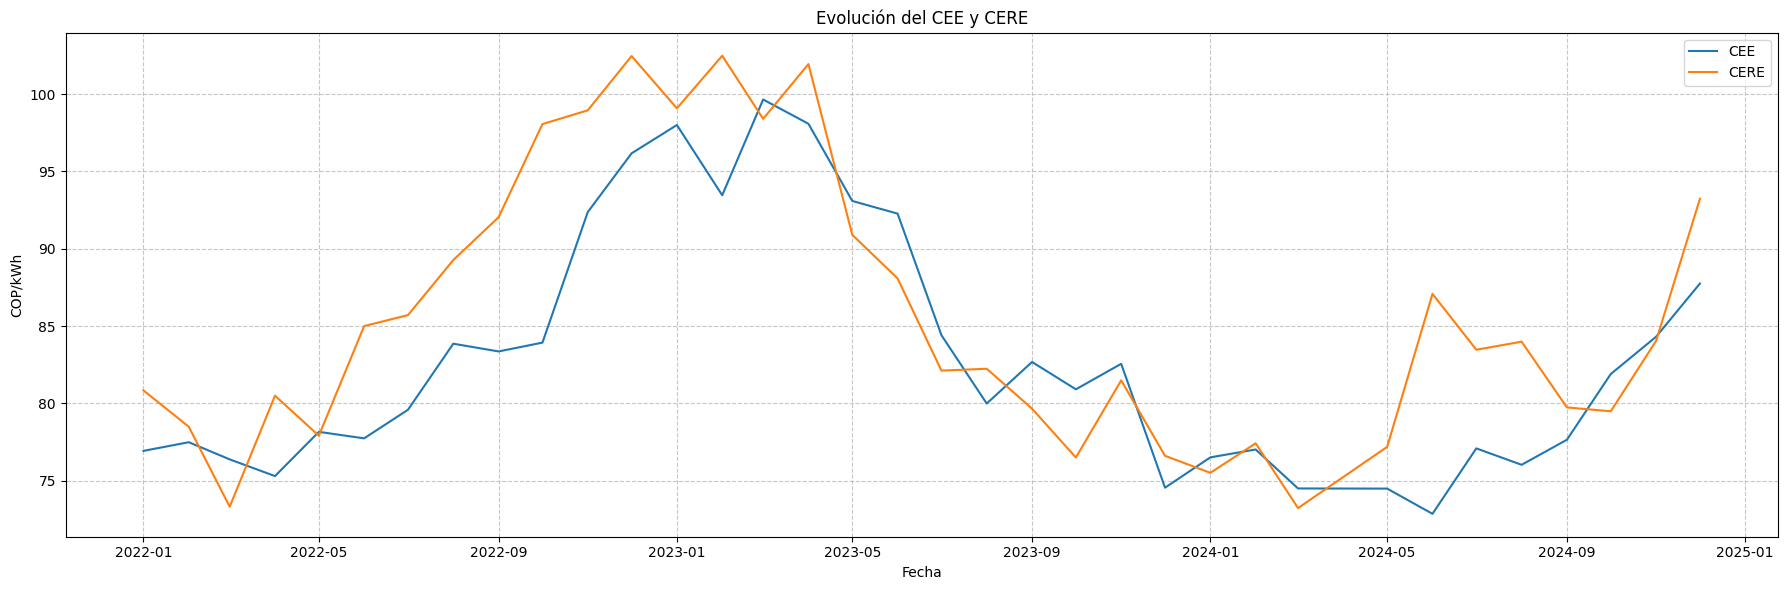

In [36]:
# Crear la figura de Matplotlib
plt.figure(figsize=(18, 6))  # Tamaño del gráfico

# Agregar la serie de tiempo para CEE
plt.plot(
    df_mensual["Fecha"],         # Eje X
    df_mensual["CEE"],           # Eje Y
    label="CEE",                 # Etiqueta de la línea
    linestyle='-',               # Estilo de línea
)

# Agregar la serie de tiempo para CERE
plt.plot(
    df_mensual["Fecha"],         # Eje X
    df_mensual["CERE"],          # Eje Y
    label="CERE",                # Etiqueta de la línea
    linestyle='-',               # Estilo de línea
)

# Configurar el diseño del gráfico
plt.title("Evolución del CEE y CERE")         # Título del gráfico
plt.xlabel("Fecha")                           # Título Eje X
plt.ylabel("COP/kWh")                         # Título Eje Y
plt.legend()                                  # Mostrar leyenda

plt.grid(True, linestyle='--', alpha=0.7)     # Líneas de guía
plt.tight_layout()                            # Ajuste automático del diseño
plt.show()                                    # Mostrar la gráfica


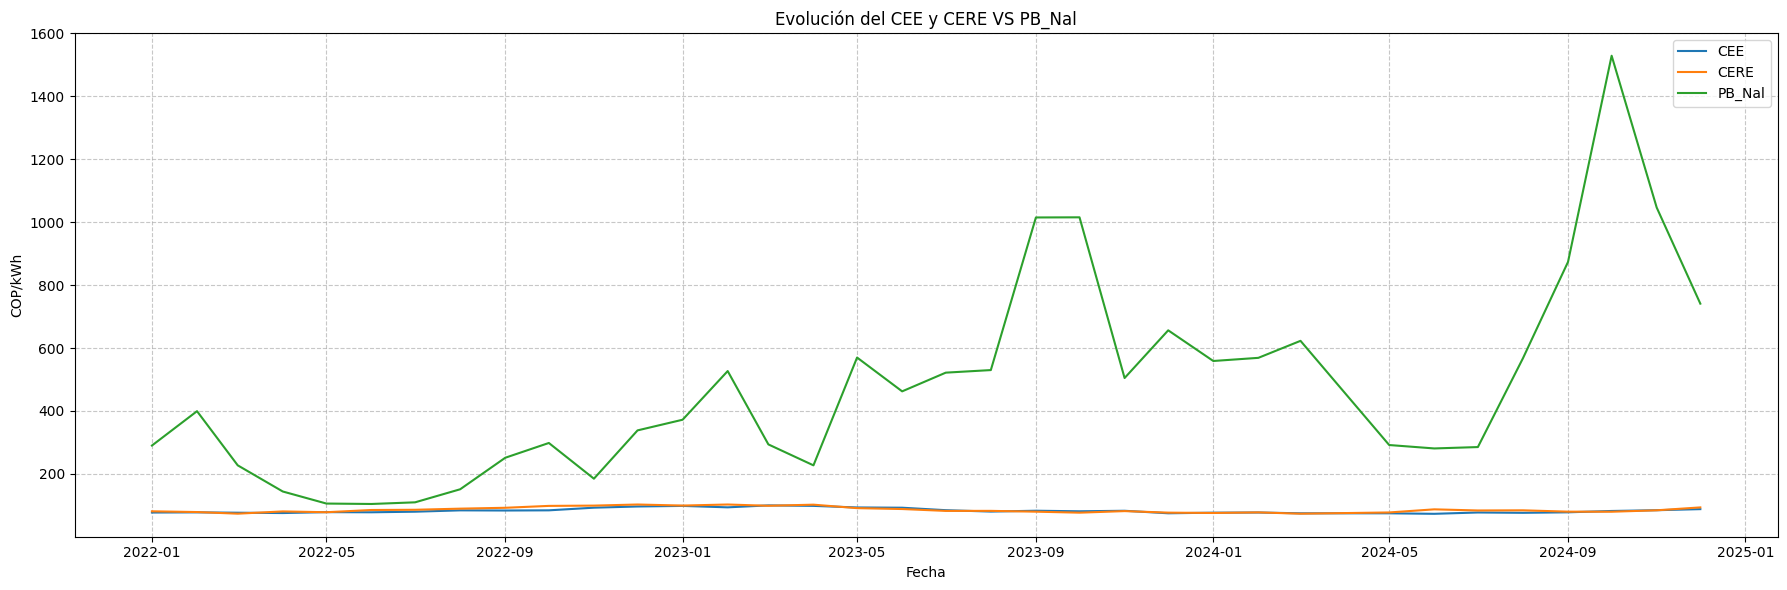

In [37]:
# Crear la figura de Matplotlib
plt.figure(figsize=(18, 6))  # Tamaño del gráfico

# Agregar la serie de tiempo para CEE
plt.plot(
    df_mensual["Fecha"],         # Eje X
    df_mensual["CEE"],           # Eje Y
    label="CEE",                 # Etiqueta de la línea
    linestyle='-',               # Estilo de línea
)

# Agregar la serie de tiempo para CERE
plt.plot(
    df_mensual["Fecha"],         # Eje X
    df_mensual["CERE"],          # Eje Y
    label="CERE",                # Etiqueta de la línea
    linestyle='-',               # Estilo de línea
)

# Agregar la serie de tiempo para PB_Nal
plt.plot(
    df_mensual["Fecha"],             # Eje X
    df_mensual["PB_Nal_mensual"],    # Eje Y
    label="PB_Nal",                  # Etiqueta de la línea
    linestyle='-',                   # Estilo de línea
)

# Configurar el diseño del gráfico
plt.title("Evolución del CEE y CERE VS PB_Nal")  # Título del gráfico
plt.xlabel("Fecha")                              # Título Eje X
plt.ylabel("COP/kWh")                            # Título Eje Y
plt.legend()                                     # Mostrar leyenda

plt.grid(True, linestyle='--', alpha=0.7)        # Líneas de guía
plt.tight_layout()                               # Ajuste automático del diseño
plt.show()                                       # Mostrar la gráfica


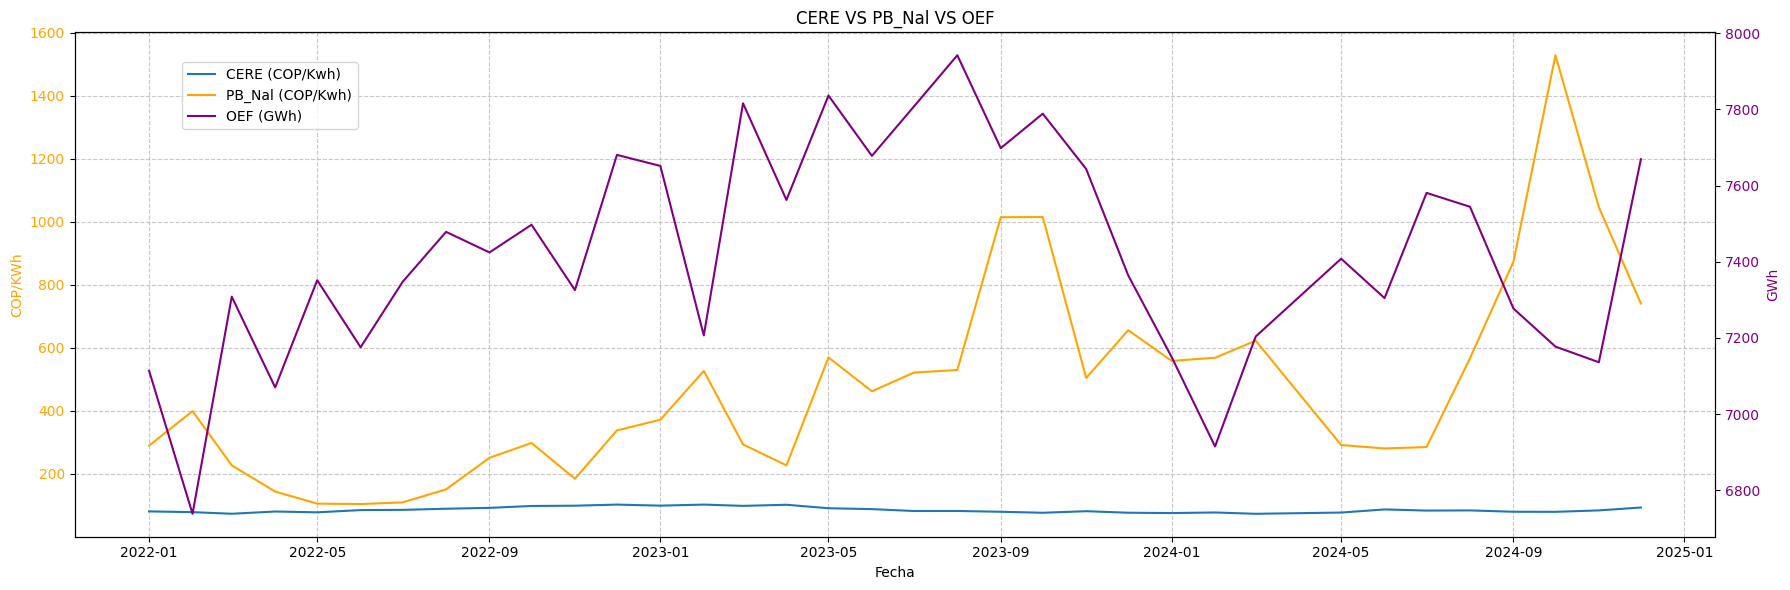

In [39]:
# Crear la figura y los ejes
fig, ax1 = plt.subplots(figsize=(18, 6))  # Tamaño del gráfico

# Trazado para X vs Y (eje izquierdo) - CERE
ax1.plot(
    df_mensual["Fecha"],               # Eje X
    df_mensual["CERE"],                # Eje Y
    label="CERE (COP/Kwh)",            # Etiqueta de la línea
    linestyle='-',                     # Estilo de línea
    marker=None                        # Sin marcador
)

# Trazado para X vs Y (eje izquierdo) - PB_Nal
ax1.plot(
    df_mensual["Fecha"],               # Eje X
    df_mensual["PB_Nal_mensual"],      # Eje Y
    label="PB_Nal (COP/Kwh)",          # Etiqueta de la línea
    linestyle='-',                     # Estilo de línea
    color='orange'                     # Color de la línea
)

# Configurar eje Y izquierdo
ax1.set_xlabel("Fecha")                                   # Título Eje X
ax1.set_ylabel("COP/KWh", color='orange')                 # Título Eje Y izquierdo
ax1.tick_params(axis='y', labelcolor='orange')            # Color de las etiquetas del eje Y izquierdo

# Crear eje Y derecho
ax2 = ax1.twinx()

# Trazado para X vs Z (eje derecho) - OEF
ax2.plot(
    df_mensual["Fecha"],               # Eje X
    df_mensual["OEFDiaria_mensual"],  # Eje Y derecho
    label="OEF (GWh)",                 # Etiqueta de la línea
    linestyle='-',                     # Estilo de línea
    color='purple'                     # Color de la línea
)

# Configurar eje Y derecho
ax2.set_ylabel("GWh", color='purple')                      # Título Eje Y derecho
ax2.tick_params(axis='y', labelcolor='purple')            # Color de las etiquetas del eje Y derecho

# Título del gráfico
plt.title("CERE VS PB_Nal VS OEF")                        # Título del gráfico

# Líneas de guía
ax1.grid(True, linestyle='--', alpha=0.7)                 # Líneas de guía

# Mostrar leyendas
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))   # Posición de la leyenda

plt.tight_layout()                                        # Ajuste automático del diseño
plt.show()                                                # Mostrar la gráfica
